In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('Salary_Data.csv')


In [7]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
#We have to find the information and description of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [13]:
# Now we will split the data in dependent and independent variales as an array

X = df.iloc[:,:-1].values
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [16]:
y = df.iloc[:,1].values
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


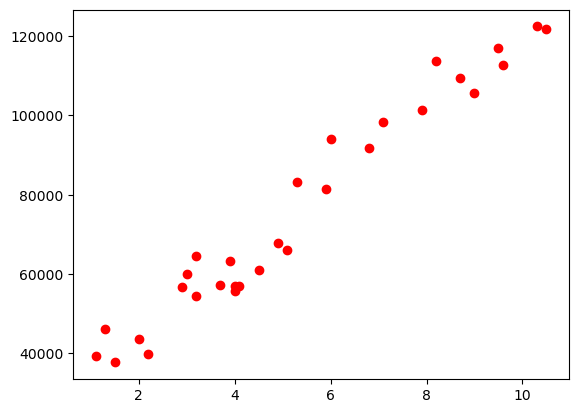

In [19]:
# Need to check the behaviour of data whether linear Regression can be use for it or not



plt.scatter(X,y,color='red')
plt.show()

In [21]:
# As we can see data is distributted in a linear line manner so we wil you Linear regression algorithm 
# First need to split the data into test and train

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [22]:
# check the dimestion
print(X_test.ndim)
print(X_train.ndim)
print(y_test.ndim)
print(y_train.ndim)

2
2
1
1


In [23]:
# now import the Linear regration class and fit the data

from sklearn.linear_model import LinearRegression

lrm = LinearRegression()
lrm.fit(X_test,y_test)

LinearRegression()

In [25]:
# Now Get the coefficint and the intersection of the Line of the model

lrm.coef_[0]

9921.71102082275

In [26]:
# Intercept

lrm.intercept_

21632.66353478926

## Model Prediction

In [27]:
y_predict = lrm.predict(X_test)

In [28]:
# check the predicted output

print(y_predict)

[ 36515.23006602 123826.28704926  62311.67872016  60327.336516
 115888.91823261 107951.54941595]


In [31]:
# Comparing the result
df1 = pd.DataFrame(y_test,columns=['Orignal data'])
df2 = pd.DataFrame(y_predict,columns = ['Predicted Result'])

pd.concat([df1,df2])

,Orignal data,Predicted Result
0,37731.0,NaN
1,122391.0,NaN
2,57081.0,NaN
3,63218.0,NaN
4,116969.0,NaN
5,109431.0,NaN
0,NaN,36515.230066
1,NaN,123826.287049
2,NaN,62311.678720
3,NaN,60327.336516


In [33]:
pd.concat([df1,df2],axis=1)

,Orignal data,Predicted Result
0,37731.0,36515.230066
1,122391.0,123826.287049
2,57081.0,62311.678720
3,63218.0,60327.336516
4,116969.0,115888.918233
5,109431.0,107951.549416


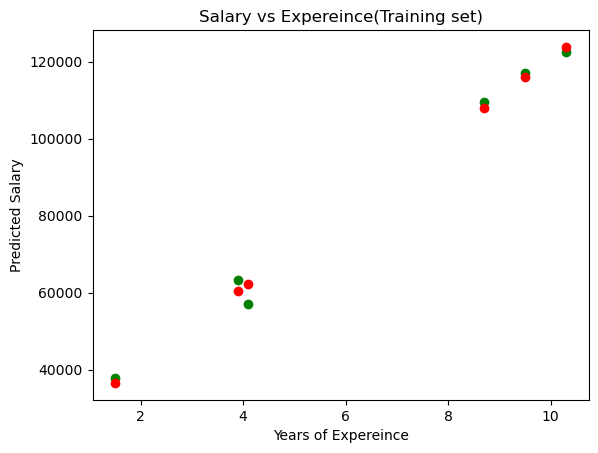

In [43]:
# Now compare the predicted and actual Data

plt.scatter(X_test,y_test,color='green')
plt.scatter(X_test,y_predict,color='red')
plt.title('Salary vs Expereince(Training set)')
plt.xlabel('Years of Expereince')
plt.ylabel('Predicted Salary')
plt.show()

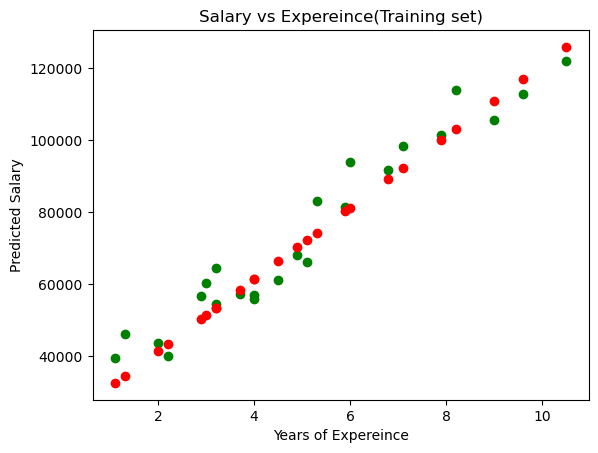

In [45]:
# Now compare the Y predicted data with the and actual Data X train data

plt.scatter(X_train,y_train,color='green')
plt.scatter(X_train,lrm.predict(X_train),color='red')
plt.title('Salary vs Expereince(Training set)')
plt.xlabel('Years of Expereince')
plt.ylabel('Predicted Salary')
plt.show()

In [47]:
# check the Accuracy of the data
## Model Evaluation

from sklearn import metrics

metrics.r2_score(y_test,y_predict)  # R2 score


0.9934483090292766

In [48]:
# MSE score
metrics.mean_squared_error(y_test,y_predict) #(MSE=Mean squre error)

7101571.892060265

In [49]:
# RMSE
metrics.median_absolute_error(y_test,y_predict) #(MAE=Mean absolute error)

1457.368816658207

In [52]:
#score(features,target) returns the R² score of our model which is the percentage of explained variance of the predictions by the model
lrm.score(X_test,y_test) #lrm.score first it will predict and then cheks score)

0.9934483090292766